In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as stats

np.set_printoptions(threshold=np.inf)

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 11}

plt.rc('font', **font)

split_int = 4
add_on_int = 2

In [2]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [3]:
# Import Data
SABG = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_SABG.xlsx", ["Prediction", "Target", "Prediction_Background", "Target_Background"])
SABG_control = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_SABG_control.xlsx", ["Prediction", "Target", "Prediction_Background", "Target_Background"])

SABG["Prediction"].Mean = SABG["Prediction"].Mean - np.mean(SABG["Prediction_Background"].Mean)
SABG["Target"].Mean = SABG["Target"].Mean - np.mean(SABG["Target_Background"].Mean)
SABG_control["Prediction"].Mean = SABG_control["Prediction"].Mean - np.mean(SABG_control["Prediction_Background"].Mean)
SABG_control["Target"].Mean = SABG_control["Target"].Mean - np.mean(SABG_control["Target_Background"].Mean)

# Split Data
SABG_prediction_array = np.array_split(np.array(SABG["Prediction"].Mean),split_int)
SABG_target_array = np.array_split(np.array(SABG["Target"].Mean),split_int)
SABG_control_prediction_array = np.array_split(np.array(SABG_control["Prediction"].Mean),split_int)
SABG_control_target_array = np.array_split(np.array(SABG_control["Target"].Mean),split_int)

# Pearson Correlation Coefficient
SABG_pearsonr_values = []
for pred, target in zip(SABG_prediction_array, SABG_target_array):
    SABG_pearsonr_values.append(pearsonr_1D(pred,target))

SABG_control_pearsonr_values = []
for pred, target in zip(SABG_control_prediction_array, SABG_control_target_array):
    SABG_control_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(SABG_pearsonr_values)
print(SABG_control_pearsonr_values)

[0.8593338231533012, 0.24824894553502985, 0.6761431994233273, 0.7642739939570371]
[0.5280337771355669, 0.46780390407478156, 0.24624603734051545, 0.30651486243117754]


In [4]:
# Import Data
CD44 = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_CD44.xlsx", ["Prediction", "Target", "Prediction_Background", "Target_Background"])
CD44_control = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220701_MSC_irrad\220701_irrad_CD44_control.xlsx", ["Prediction", "Target", "Prediction_Background", "Target_Background"])

CD44["Prediction"].Mean = CD44["Prediction"].Mean - np.mean(CD44["Prediction_Background"].Mean)
CD44["Target"].Mean = CD44["Target"].Mean - np.mean(CD44["Target_Background"].Mean)
CD44_control["Prediction"].Mean = CD44_control["Prediction"].Mean - np.mean(CD44_control["Prediction_Background"].Mean)
CD44_control["Target"].Mean = CD44_control["Target"].Mean - np.mean(CD44_control["Target_Background"].Mean)

# Split Data
CD44_prediction_array = np.array_split(np.array(CD44["Prediction"].Mean),split_int)
CD44_target_array = np.array_split(np.array(CD44["Target"].Mean),split_int)
CD44_control_prediction_array = np.array_split(np.array(CD44_control["Prediction"].Mean),split_int)
CD44_control_target_array = np.array_split(np.array(CD44_control["Target"].Mean),split_int)

# Pearson Correlation Coefficient
CD44_pearsonr_values = []
for pred, target in zip(CD44_prediction_array, CD44_target_array):
    CD44_pearsonr_values.append(pearsonr_1D(pred,target))

CD44_control_pearsonr_values = []
for pred, target in zip(CD44_control_prediction_array, CD44_control_target_array):
    CD44_control_pearsonr_values.append(pearsonr_1D(pred,target))
    
print(CD44_pearsonr_values)
print(CD44_control_pearsonr_values)

[0.7840819904885805, 0.9380915465587534, 0.8598543901960586, 0.7198766189638698]
[0.5588630344604874, 0.9179762743292089, 0.07303384506619683, 0.03307174624913186]


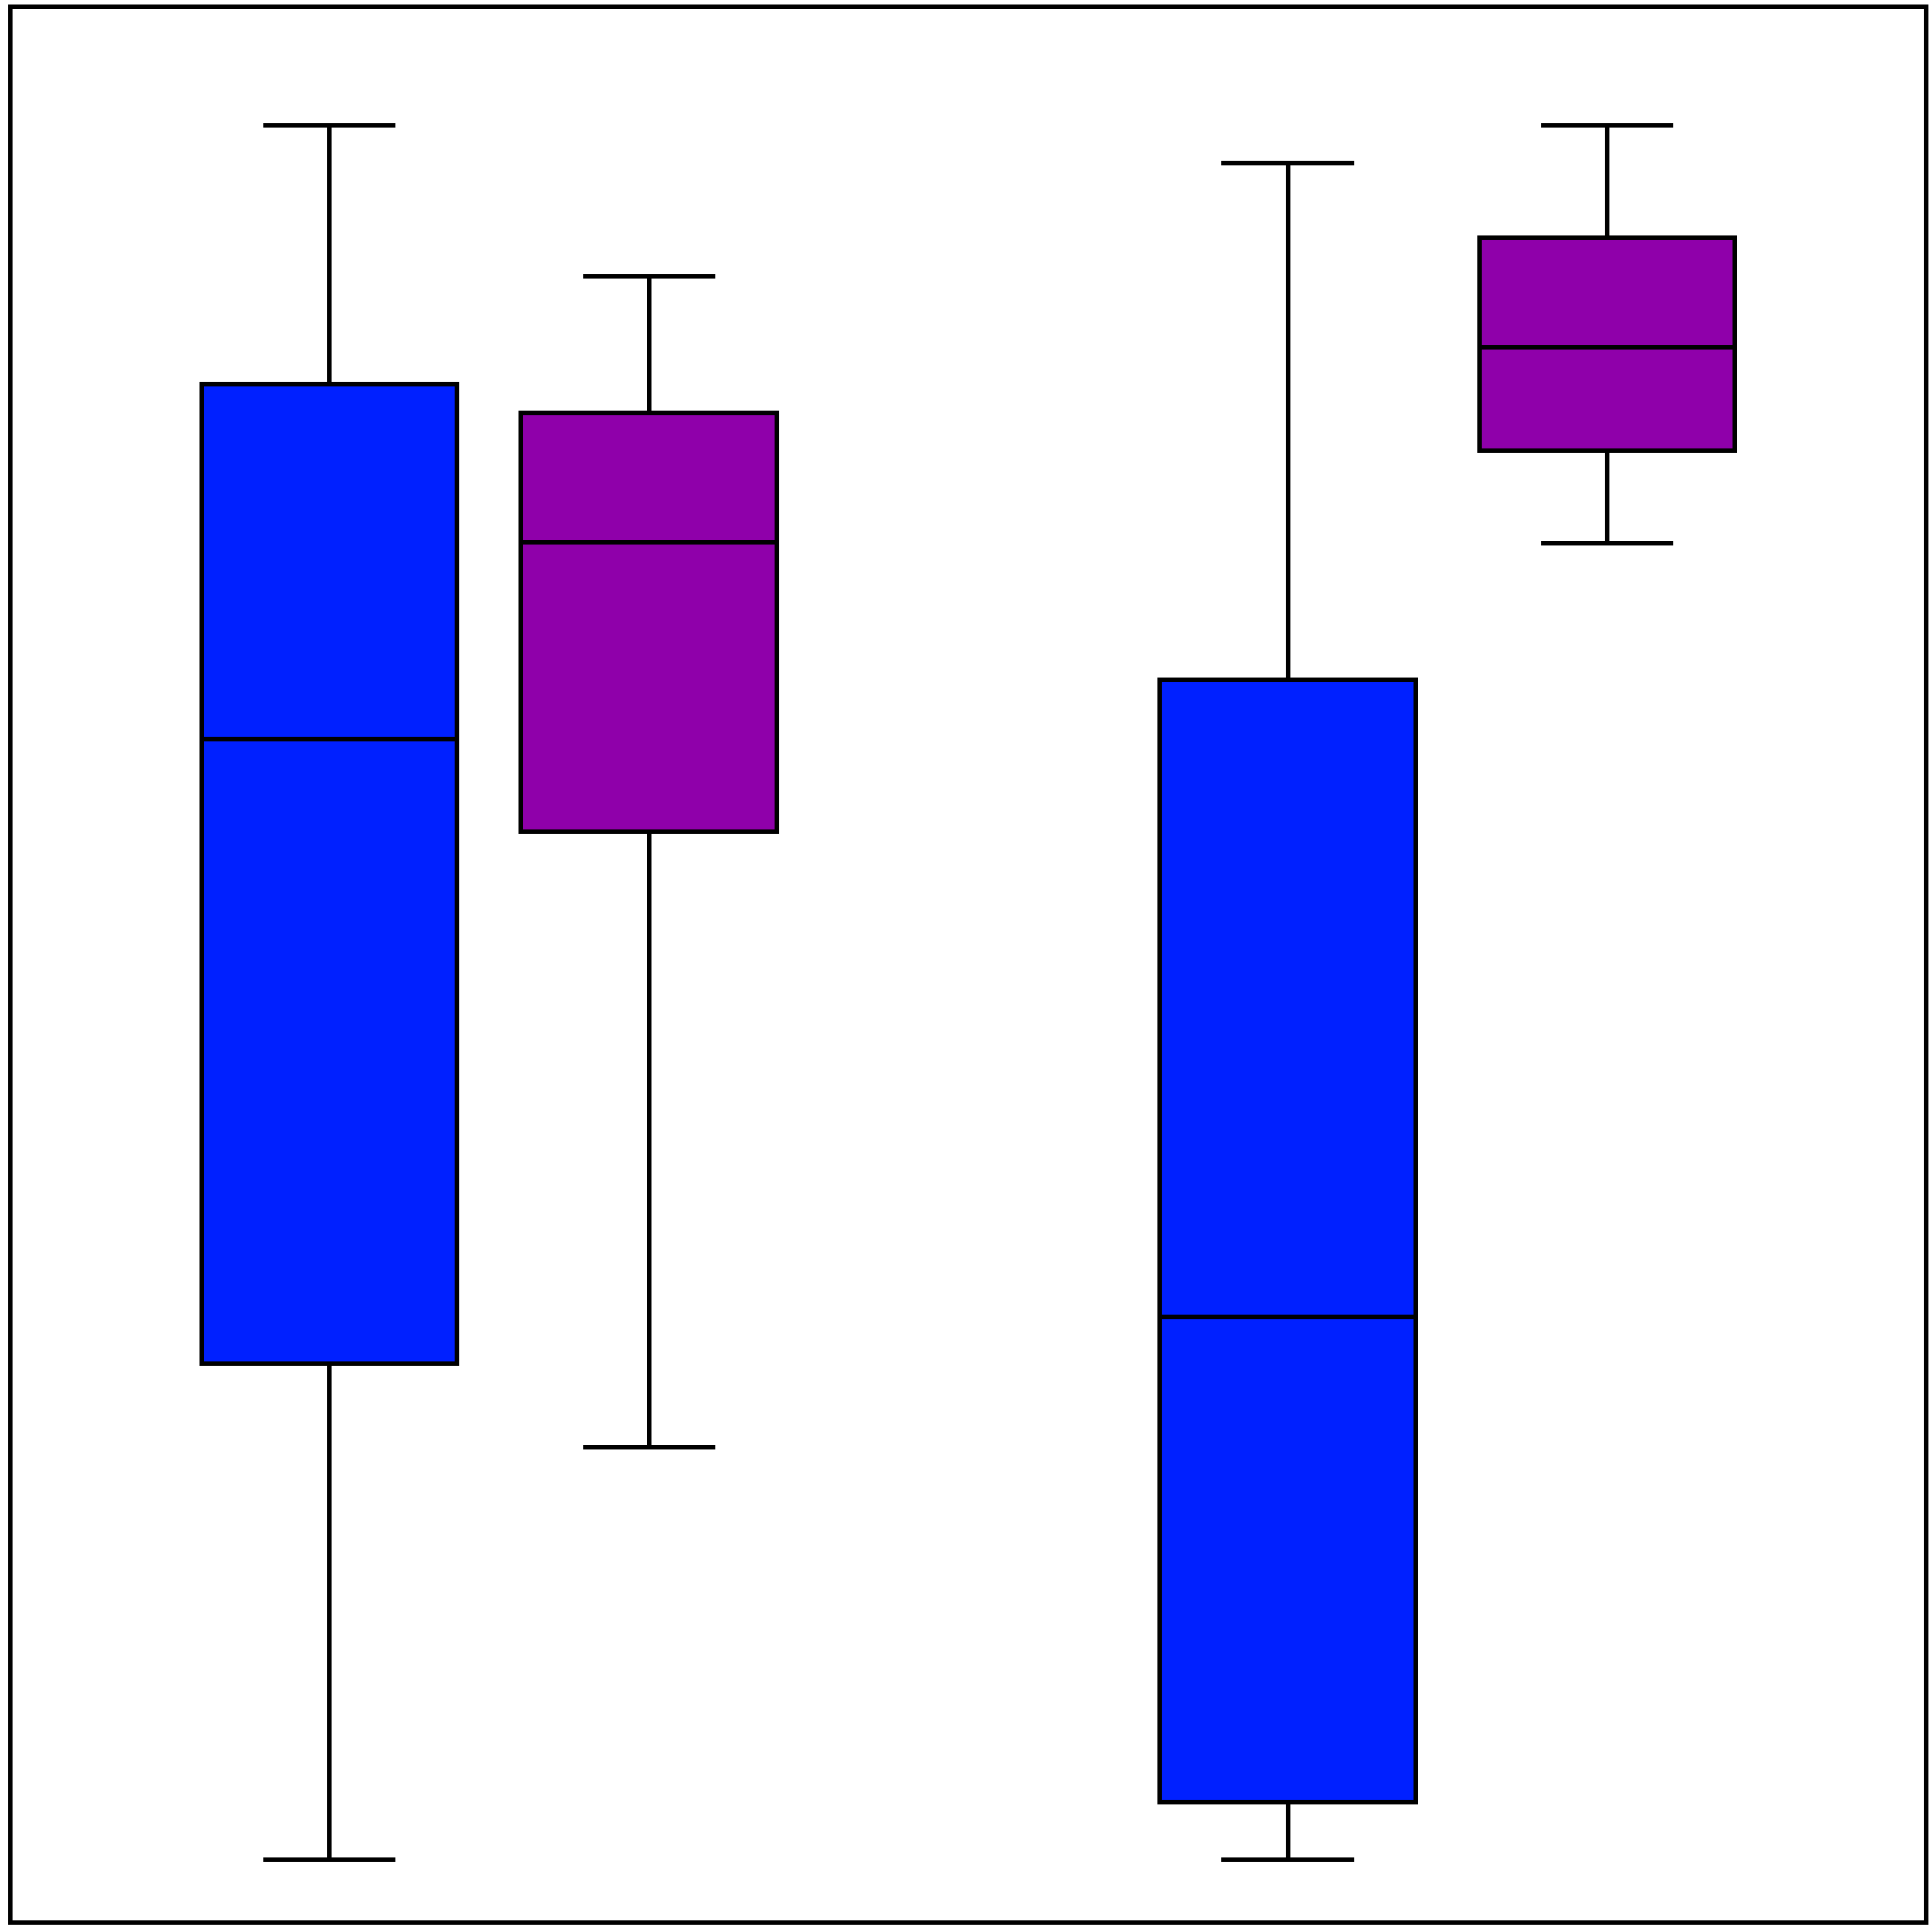

In [9]:
fig, ax = plt.subplots(figsize = [30,30])

plt.ylim(0,1)
ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

color1 = '#0020ff'
color2 = '#8F00AA'

def set_box_color (bp):
    plt.setp (bp['boxes'][0], color = 'black', facecolor = color1)
    plt.setp (bp['whiskers'][0], color = 'black')
    plt.setp (bp['whiskers'][1], color = 'black')
    plt.setp (bp['caps'][0], color = 'black')
    plt.setp (bp['caps'][1], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    plt.setp (bp['medians'][0], color = 'black')
    
    plt.setp (bp['boxes'][1], color = 'black', facecolor = color2)
    plt.setp (bp['whiskers'][2], color = 'black')
    plt.setp (bp['whiskers'][3], color = 'black')
    plt.setp (bp['caps'][2], color = 'black')
    plt.setp (bp['caps'][3], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')
    plt.setp (bp['medians'][1], color = 'black')


# Rectangular Box Plot with Data
boxprops = dict(linestyle='-', linewidth=5)
medianprops = dict(linestyle='-', linewidth=5)
meanprops = dict(linestyle='-', linewidth=5)
whiskerproprs = dict(linestyle='-', linewidth=5)

SABG_bplot = ax.boxplot ([SABG_control_pearsonr_values, SABG_pearsonr_values], boxprops = boxprops, medianprops = medianprops, vert = True, patch_artist = True, positions = [1,2],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (SABG_bplot)

for whisker in SABG_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in SABG_bplot['caps']:
    caps.set(linewidth = 5)
    
CD44_bplot = ax.boxplot ([CD44_control_pearsonr_values, CD44_pearsonr_values], boxprops = boxprops, medianprops = medianprops, vert = True, patch_artist = True, positions = [4,5],  widths = 0.8, showfliers=False, flierprops = {'marker': 'x'})
set_box_color (CD44_bplot)

for whisker in CD44_bplot['whiskers']: 
    whisker.set(linewidth = 5)

for caps in CD44_bplot['caps']:
    caps.set(linewidth = 5)

# Organize Plot
plt.xlim (0, 6)
plt.ylim (0, 1)
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels (['SABG', 'CD44'])

# plt.title ("Single Cell Pearson Correlation Coefficient")
plt.ylabel ("r")

# control_label = mpatches.Patch(facecolor=color1, edgecolor = 'black', linewidth = 5, label = "                 ")
# dox_label = mpatches.Patch(facecolor=color2, edgecolor = 'black', linewidth = 5, label = "                   ")
# plt.legend(handles=[control_label, dox_label], frameon=False, fontsize = 70, borderpad = 0, labelspacing = 0, handlelength = 2)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# Add combined in addition to Control and Dox

plt.tight_layout()
plt.savefig(fname="dox_pearson")

In [6]:
total_pearsonr_values = SABG_control_pearsonr_values
total_pearsonr_values += SABG_pearsonr_values
total_pearsonr_values += CD44_control_pearsonr_values
total_pearsonr_values += CD44_pearsonr_values
print (np.mean(total_pearsonr_values))

0.5613404993351889
